---

## Machine Learning untuk Segmentasi Pengguna dan Prediksi Loyalitas dalam Platform E-commerce

# Analisis Dataset Pembelajaran Mesin dalam Ritel

Proyek ini bertujuan untuk menerapkan teknik pembelajaran mesin pada dataset ritel guna menemukan wawasan yang dapat membantu meningkatkan strategi bisnis dan pengalaman pelanggan.

## Gambaran Dataset

Dataset ini berisi berbagai informasi yang relevan terkait pesanan pelanggan, yang meliputi data berikut:

- **Timestamp**: Waktu pembelian, pengiriman, dan pengantaran produk.
- **Produk**: Nama produk, ID produk, serta harga dalam USD dan mata uang lokal.
- **Detail Pelanggan**: Informasi tentang partisipasi pelanggan dalam program loyalitas dan usia akun mereka.
- **Informasi Transaksi**: Platform pembelian, saluran pemasaran yang digunakan, serta kode negara pelanggan.

### Langkah-langkah Pra-pemrosesan

Sebelum memulai analisis dengan model pembelajaran mesin, beberapa langkah pra-pemrosesan perlu dilakukan:

1. **Konversi Datetime**: Mengubah timestamp menjadi objek `datetime` agar lebih mudah dalam manipulasi data.
2. **Rekayasa Fitur**:
   - Menghitung waktu pengiriman dan usia akun dalam satuan hari.
   - Mengkodekan variabel kategorikal (misalnya, nama produk dan platform pembelian) agar bisa diproses oleh model.
3. **Penanganan Data yang Hilang**: Mengganti nilai yang hilang dengan nilai median untuk kolom numerik.

---

## Komponen Pembelajaran Mesin

Berikut ini adalah beberapa komponen pembelajaran mesin yang diterapkan untuk menganalisis dataset dan menghasilkan wawasan yang berguna:

### 1. **Segmentasi Pelanggan**  
**Tujuan**: Membagi pelanggan ke dalam segmen-segmen berdasarkan perilaku dan data transaksi mereka.

- **Fitur yang Digunakan**:
  - Harga USD
  - Harga Lokal
  - Waktu Pengiriman (dalam hari)
  - Usia Akun (dalam hari)
  - Partisipasi dalam Program Loyalitas

- **Metodologi**:
  - Fitur dinormalisasi menggunakan `StandardScaler` untuk memastikan semua variabel berada dalam skala yang setara.
  - Menggunakan K-Means clustering untuk mengelompokkan pelanggan ke dalam tiga segmen berdasarkan pola pembelian mereka.

- **Output**: Visualisasi kluster pelanggan yang terbentuk, ditampilkan dalam diagram sebar yang membandingkan harga USD dan usia akun.

### 2. **Prediksi Churn**  
**Tujuan**: Memprediksi kemungkinan seorang pelanggan akan berhenti menggunakan layanan atau produk (churn).

- **Fitur yang Digunakan**:
  - Harga USD
  - Partisipasi dalam Program Loyalitas
  - Saluran Pemasaran
  - Platform Pembelian
  - Usia Akun

- **Metodologi**:
  - Pisahkan data menjadi set pelatihan dan pengujian.
  - Latih model menggunakan `RandomForestClassifier`.
  - Evaluasi hasil model dengan menghitung skor akurasi.

- **Output**: Akurasi prediksi churn yang menunjukkan seberapa baik model dalam mengidentifikasi pelanggan yang berisiko berhenti berbelanja.

### 3. **Prediksi Waktu Pengiriman**  
**Tujuan**: Memprediksi waktu yang dibutuhkan untuk mengirimkan suatu pesanan.

- **Fitur yang Digunakan**:
  - Harga USD
  - Harga Lokal
  - Mata Uang
  - Kode Negara
  - Platform Pembelian

- **Metodologi**:
  - Pisahkan dataset menjadi dua bagian: data pelatihan dan data pengujian.
  - Latih model menggunakan algoritma `LinearRegression`.
  - Evaluasi kinerja model dengan menggunakan **Mean Absolute Error (MAE)** untuk mengukur kesalahan prediksi.

### 4. **Analisis Penetapan Harga Dinamis**  
**Tujuan**: Menganalisis distribusi harga produk dalam berbagai mata uang.

- **Metodologi**:
  - Visualisasikan distribusi harga produk menggunakan box plot.

- **Output**: Box plot yang menggambarkan distribusi harga untuk setiap mata uang, memberikan wawasan tentang perbedaan harga antar negara.

### 5. **Sistem Rekomendasi**  
**Tujuan**: Merekomenasikan produk kepada pelanggan berdasarkan riwayat transaksi mereka.

- **Fitur yang Digunakan**:
  - ID Pengguna
  - Harga USD

- **Metodologi**:
  - Latih model `NearestNeighbors` dengan menggunakan kesamaan kosinus untuk menemukan produk yang serupa.
  - Rekomendasikan produk untuk pengguna tertentu berdasarkan produk yang dibeli oleh tetangga terdekat.

- **Output**: Daftar produk yang direkomendasikan untuk pengguna berdasarkan riwayat pembelian mereka.

### 6. **Efektivitas Kampanye Pemasaran**  
**Tujuan**: Menganalisis efektivitas saluran pemasaran yang digunakan untuk menarik pelanggan.

- **Metodologi**:
  - Visualisasikan hubungan antara saluran pemasaran dan partisipasi dalam program loyalitas menggunakan count plots.

- **Output**: Count plot yang menunjukkan distribusi partisipasi dalam program loyalitas berdasarkan saluran pemasaran, membantu mengidentifikasi saluran yang paling efektif.

---

## Alat dan Perpustakaan

Berikut adalah beberapa alat dan perpustakaan yang digunakan dalam proyek ini:

- **Pandas**: Untuk manipulasi dan analisis data.
- **NumPy**: Untuk perhitungan numerik.
- **Matplotlib/Seaborn**: Untuk visualisasi data.
- **Scikit-learn**: Untuk model pembelajaran mesin dan preprocessing data.


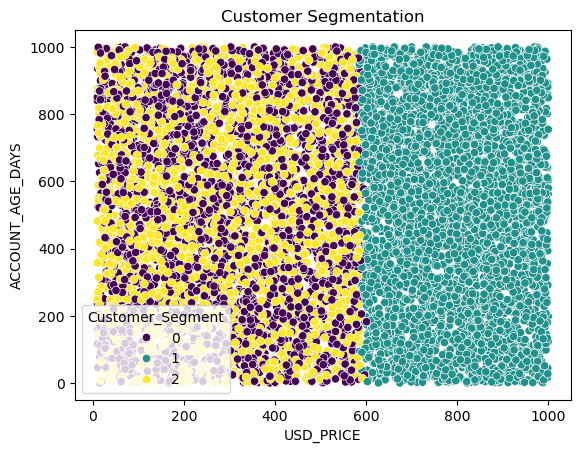

Churn Prediction Accuracy: 1.0
Delivery Time MAE: 2.4950786879253526


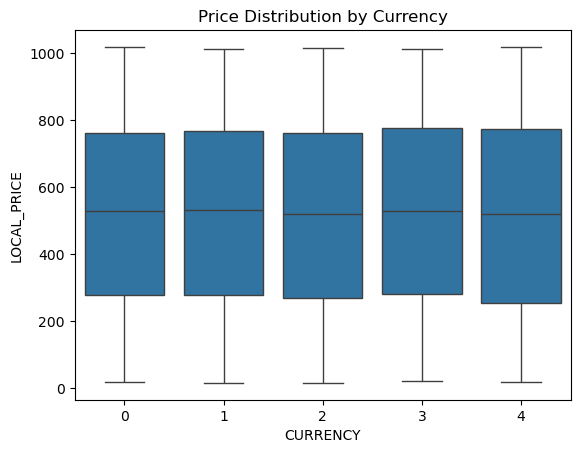

Recommended Products:
14
29
29


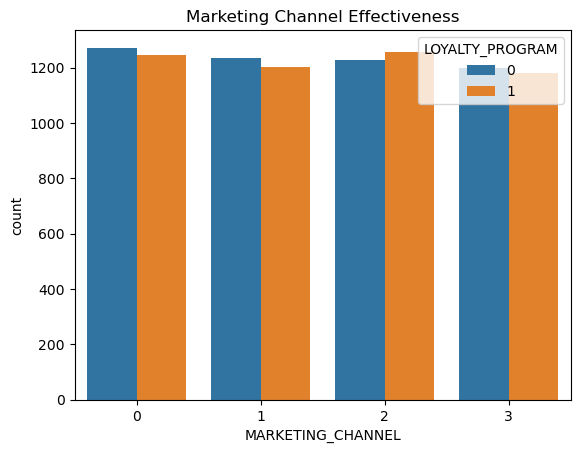

In [17]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('order_data.csv')

# Preprocessing
def preprocess_data(df):
    # Convert timestamps to datetime
    for col in ['PURCHASE_TS', 'SHIP_TS', 'DELIVERY_TS', 'CREATED_ON']:
        df[col] = pd.to_datetime(df[col])

    # Calculate delivery time in days
    df['DELIVERY_TIME_DAYS'] = (df['DELIVERY_TS'] - df['SHIP_TS']).dt.days

    # Calculate account age in days
    df['ACCOUNT_AGE_DAYS'] = (df['PURCHASE_TS'] - df['CREATED_ON']).dt.days

    # Encode categorical variables except IDs
    label_encoders = {}
    categorical_columns = ['PRODUCT_NAME', 'PURCHASE_PLATFORM', 'MARKETING_CHANNEL', 
                           'ACCOUNT_CREATION_METHOD', 'COUNTRY_CODE', 'CURRENCY']
    for col in categorical_columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

    # Fill missing values (if any)
    df.fillna(df.select_dtypes(include=[np.number]).median(), inplace=True)

    return df, label_encoders

df, label_encoders = preprocess_data(df)

# 1. Customer Segmentation
scaler = StandardScaler()
segmentation_features = ['USD_PRICE', 'LOCAL_PRICE', 'DELIVERY_TIME_DAYS', 'ACCOUNT_AGE_DAYS', 'LOYALTY_PROGRAM']
X_scaled = scaler.fit_transform(df[segmentation_features])

kmeans = KMeans(n_clusters=3, random_state=42)
df['Customer_Segment'] = kmeans.fit_predict(X_scaled)

sns.scatterplot(x=df['USD_PRICE'], y=df['ACCOUNT_AGE_DAYS'], hue=df['Customer_Segment'], palette='viridis')
plt.title('Customer Segmentation')
plt.show()

# 2. Churn Prediction
churn_features = ['USD_PRICE', 'LOYALTY_PROGRAM', 'MARKETING_CHANNEL', 'PURCHASE_PLATFORM', 'ACCOUNT_AGE_DAYS']
X = df[churn_features]
y = df['LOYALTY_PROGRAM']  # Assuming churn relates to loyalty program participation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Churn Prediction Accuracy:", accuracy_score(y_test, y_pred))

# 3. Delivery Time Prediction
delivery_features = ['USD_PRICE', 'LOCAL_PRICE', 'CURRENCY', 'COUNTRY_CODE', 'PURCHASE_PLATFORM']
X = df[delivery_features]
y = df['DELIVERY_TIME_DAYS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("Delivery Time MAE:", mean_absolute_error(y_test, y_pred))

# 4. Dynamic Pricing Analysis
sns.boxplot(x='CURRENCY', y='LOCAL_PRICE', data=df)
plt.title('Price Distribution by Currency')
plt.show()

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

# 5. Recommendation System
recommendation_features = ['USER_ID', 'USD_PRICE']
neighbors = NearestNeighbors(n_neighbors=3, metric='cosine')
X = df[recommendation_features]
neighbors.fit(X)

# Example: Recommend for a user
example_user = np.array([df['USER_ID'].iloc[0], df['USD_PRICE'].iloc[0]]).reshape(1, -1)
distances, indices = neighbors.kneighbors(example_user)
print("Recommended Products:")
for idx in indices[0]:
    print(df['PRODUCT_NAME'].iloc[idx])


# 6. Marketing Campaign Effectiveness
sns.countplot(x='MARKETING_CHANNEL', hue='LOYALTY_PROGRAM', data=df)
plt.title('Marketing Channel Effectiveness')
plt.show()
